In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [10]:
#Explore data dase
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).first()

('2010-01-01',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

start_date=session.query(measurement.date).order_by(measurement.date.desc()).first()

print('Last date{}'.format(start_date))

Last date('2017-08-23',)


In [13]:
# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)

print('Year ago{}'.format(year_ago))

Year ago2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
scores=session.query(measurement.date,measurement.prcp).filter(measurement.date>year_ago).\
order_by(measurement.date).all()

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
scores_df=pd.DataFrame(scores)
scores_df=scores_df.set_index('date')
scores_df=scores_df.sort_index()
scores_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


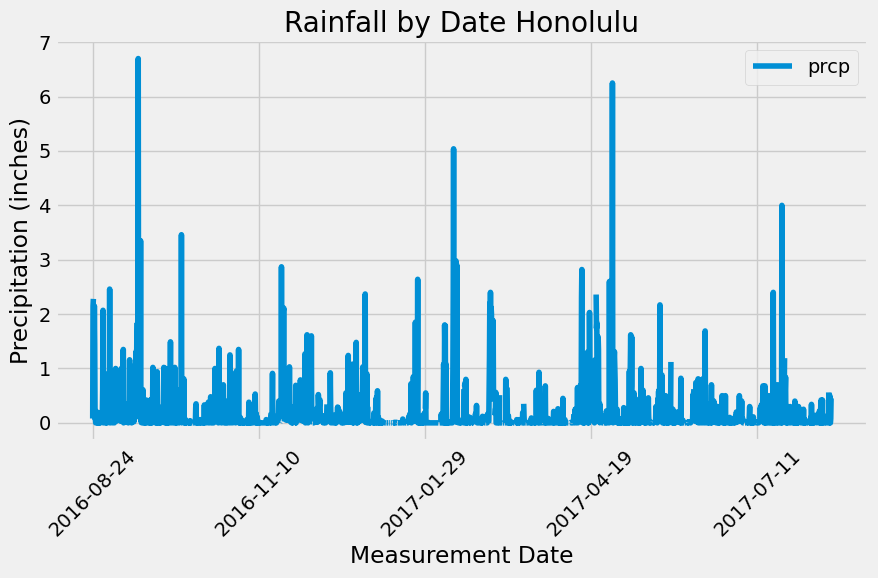

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
graph = scores_df.plot(rot=45, title = "Rainfall by Date Honolulu",
                       xlabel='Measurement Date',
                       ylabel = "Precipitation (inches)",
                       figsize=(9,6))
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
scores_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(measurement.station)).all()

[(19550,)]

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(measurement.station, func.count(measurement.id))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
select = [measurement.station,
       func.min(measurement.tobs), 
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]

station_temp = session.query(*select).\
        filter(measurement.station == 'USC00519281').\
        group_by(measurement.station)
for station in station_temp:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_station = session.query(measurement.station, measurement.tobs)\
    .filter(measurement.date > '2016-08-23')\
    .filter(measurement.date <= '2017-08-23')\
    .filter(measurement.station == "USC00519281").all()

tobs_station


[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [28]:
# Create a dataframe containing the results of this query
station_df = pd.DataFrame(tobs_station, columns=["Station", "Temp. Observations"])
station_df

,Station,Temp. Observations
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0
...,...,...
346,USC00519281,77.0
347,USC00519281,77.0
348,USC00519281,76.0
349,USC00519281,76.0


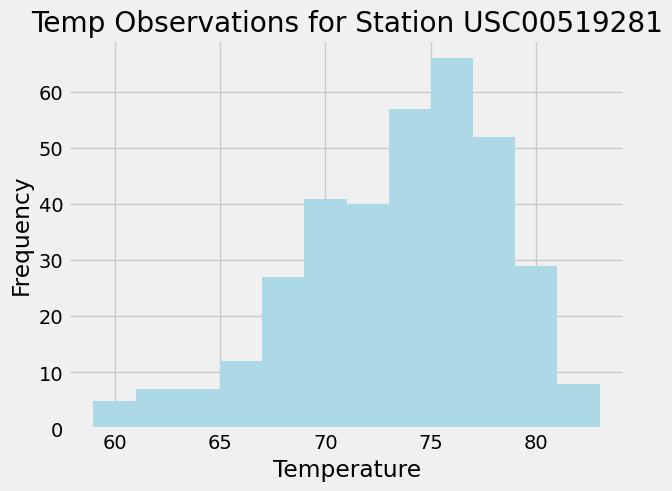

In [30]:
#Create a histogram with bins=12 
station_df["Temp. Observations"].hist(bins=12, color="lightblue")
plt.title("Temp Observations for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [31]:
# Close Session
session.close()